<a href="https://colab.research.google.com/github/sarwaridas/JamesWebbSpaceTelescope/blob/main/Exploring_JWST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Accessing James Webb Space Telescope Data


In [5]:
# !pip install astropy
# !pip install --pre astroquery

In [6]:
from astropy.io import fits
from astroquery.mast import Observations
import numpy as np

Querying MAST via Astroquery
- Querying JWST mission
- Limiting observations to Planetary Nebula NGC 3132

In [12]:
# Limit our query to NGC 3132
obsByName = Observations.query_object("NGC 3132",radius=".02 deg")
jwst = obsByName[(obsByName['obs_collection'] == 'JWST')]
print(jwst['obsid', 'instrument_name', 'filters', 'obs_id', 't_min'])

 obsid   instrument_name ...       t_min      
-------- --------------- ... -----------------
73966518         NIRSPEC ... 59664.49621433866
87602454          NIRCAM ... 59733.74120144838
87602522          NIRCAM ... 59733.70454250509
87602523          NIRCAM ... 59733.66775883611
87602457          NIRCAM ... 59733.74120218912
87602459          NIRCAM ... 59733.66775883611
87602464          NIRCAM ... 59733.70454250509
87602450            MIRI ... 59742.52554607129
87602461            MIRI ... 59742.54989271481
87602456            MIRI ... 59742.57449639537
87602452            MIRI ... 59742.50030178889


- choosing a random observation to study
- choosing calibration
- choosing image product type

In [15]:
# Pick random observation from the list.
obs_87602459 = jwst[(jwst['obsid'] == '87602459')]
print("\n Observation 87602459 of NGC 3132: \n")
print(obs_87602459)

# Get a list of the "Data Products" available from the observations.
dataProducts = Observations.get_product_list(obs_87602459)
calibrated = dataProducts[(dataProducts['calib_level'] == 3)]
i2d = calibrated[(calibrated["productSubGroupDescription"] == "I2D")]

# downloading data
manifest = Observations.download_products(i2d,mrp_only=True)


 Observation 87602459 of NGC 3132: 

intentType obs_collection provenance_name ... srcDen  obsid   distance
---------- -------------- --------------- ... ------ -------- --------
   science           JWST         CALJWST ...    nan 87602459      0.0


### Loading and Viewing Downloaded Data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing some special packages to display astronomy data.
from matplotlib.colors import LogNorm
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
dp_87602459 = fits.open(manifest['Local Path'][0])

In [17]:
dp_87602459.info()

Filename: ./mastDownload/JWST/jw02733-o001_t001_nircam_f405n-f444w/jw02733-o001_t001_nircam_f405n-f444w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     374   ()      
  1  SCI           1 ImageHDU        75   (2356, 2348)   float32   
  2  ERR           1 ImageHDU        10   (2356, 2348)   float32   
  3  CON           1 ImageHDU         9   (2356, 2348)   int32   
  4  WHT           1 ImageHDU         9   (2356, 2348)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (2356, 2348)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (2356, 2348)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (2356, 2348)   float32   
  8  HDRTAB        1 BinTableHDU    816   8R x 403C   [23A, 5A, 3A, 48A, 7A, 13A, 7A, 5A, 7A, 10A, 4A, L, D, D, D, D, 32A, 48A, 32A, 21A, 3A, 3A, D, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 23A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 8A, 8A, 5A, D, D, D, D, D, D, 27A, D,

In [19]:
data= dp_87602459[1].data
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
data.shape

(2348, 2356)

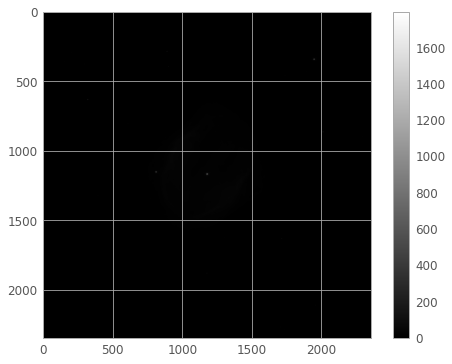

In [21]:
# Let's plot it as an image and see what we get:
plt.figure()
plt.imshow(data, cmap='gray')
plt.colorbar()

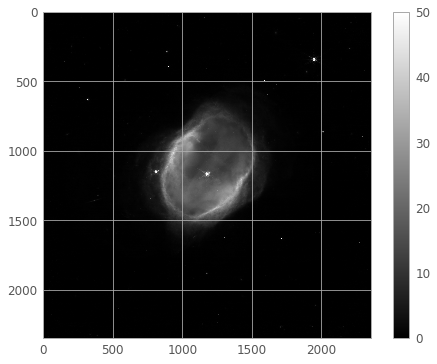

In [22]:
plt.figure()
plt.imshow(data, cmap='gray',interpolation='nearest',
               vmin=0, vmax=50)
plt.colorbar()